# Chaotic Dynamics with Restricted Three-Body Problem

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mpl_config

In [2]:
xs = 0.1 * np.array([1, 1, -1])
ys = 0.1 * np.array([1, -1, 0])
vxs = np.array([0,  0.01, 0.02])
vys = np.array([0, -0.03, 0.04])
# vxs = 0.1 * (np.random.rand(3) - 0.5)
# vys = 0.1 * (np.random.rand(3) - 0.5)

ms = np.array([1, 1, 1])
G = 0.001

In [3]:
def get_distance_mat(xs, ys):
    dis_x = (xs.reshape(1, 3) - xs.reshape(3, 1))**2
    dis_y = (ys.reshape(1, 3) - ys.reshape(3, 1))**2
    return np.sqrt(dis_x + dis_y)

In [4]:
def get_force_mat(xs, ys):
    dis_mat = get_distance_mat(xs, ys)
    dis_mat[dis_mat == 0] = np.inf
    return G * ms.reshape(1, 3) * ms.reshape(3, 1) / dis_mat**2

In [5]:
def f(t, variables):
    xs = variables[:3]
    ys = variables[3:6]
    vxs = variables[6:9]
    vys = variables[9:]

    dis_mat = get_distance_mat(xs, ys)
    dis_mat[dis_mat == 0] = np.inf
    force_mat = get_force_mat(xs, ys)
    dvxs = np.sum((xs.reshape(1, 3) - xs.reshape(3, 1)) / dis_mat * force_mat, axis=1) / ms
    dvys = np.sum((ys.reshape(1, 3) - ys.reshape(3, 1)) / dis_mat * force_mat, axis=1) / ms

    return np.concatenate([vxs, vys, dvxs, dvys])

In [6]:
from scipy.integrate import solve_ivp

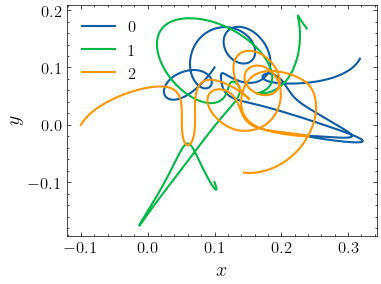

In [7]:
total_time = 20
res = solve_ivp(f, [0, total_time], np.concatenate([xs, ys, vxs, vys]), method="BDF", rtol=1e-5, atol=1e-8) 
for i in range(3):
    plt.plot(res.y[i, :], res.y[3+i, :], label=i)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

Problems
- What is the time integration step?
- What is `method`?
- What is `rtol` and `atol`?
- Is the trajectory sensitive to the initial condition (coordinate, speed, mass)?

In [8]:
from matplotlib import animation
from IPython.display import HTML

In [9]:
line1 = plt.plot([], [])[0]
line2 = plt.plot([], [])[0]
line3 = plt.plot([], [])[0]
lines = [line1, line2, line3]
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.tight_layout()

# frames per unit time
fpt = 10

def func(frame):
    end = np.sum(res.t < (frame / fpt))
    for i in range(3):
        lines[i].set_xdata(res.y[i, :end])
        lines[i].set_ydata(res.y[3+i, :end])

ani = animation.FuncAnimation(plt.gcf(), func, frames=total_time * fpt, interval=16)
# prevent showing the blank figure
plt.close()
HTML(ani.to_jshtml())